# A/B Testing
Explore 2-sample comparisons using A/B testing. The data used is the infant health dataset:

<ol>
<li>bwt: Birth weight in ounces (999 unknown)</li>
<li>gestation: Length of pregnancy in days (999 unknown)</li>
<li>parity: 0= first born, 9=unknown</li>
<li>height: mother's height in inches (99 unknown)</li>
<li>weight: Mother's prepregnancy weight in pounds (999 unknown)</li>
<li>smoke: Smoking status of mother (0=not now, 1=yes now, 9=unknown)</li>
</ol>


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import copy

# Part A: Load & Clean Data

In [2]:
data = pd.read_csv("babies.data", delimiter="\s+")
len(data)

1236

In [3]:
data.head(3)

bwt  gestation  parity  age  height  weight  smoke
0  120        284       0   27      62     100      0
1  113        282       0   33      64     135      0
2  128        279       0   28      64     115      1

Find unknown smoking status and unknown bwt

In [4]:
data_bwt = data[(data.bwt != 999) & (data.smoke != 9)]

In [5]:
len(data_bwt)

1226

In [6]:
smoking = data_bwt[data_bwt.smoke == 1]
nonsmoking = data_bwt[data_bwt.smoke == 0]

In [7]:
smoking_bwt_mean = np.mean(smoking.bwt)
print("Mean birth weight with smoking:",smoking_bwt_mean)

Mean birth weight with smoking: 114.10950413223141


In [8]:
nonsmoking_bwt_mean = np.mean(nonsmoking.bwt)
print("Mean birth weight without smoking:",nonsmoking_bwt_mean)

Mean birth weight without smoking: 123.04716981132076


In [9]:
print("Difference between means:",np.abs(nonsmoking_bwt_mean-smoking_bwt_mean))

Difference between means: 8.93766567908935


By just looking at the difference in mean baby weights, the suggestion is that, on average, maternal smoking leads to lower birth weights.

# Part B: A/B Testing for Birth Weight

**Null:**<br />
The distribution of birth weights of babies is the same for mothers who don't smoke
as for mothers who do. The difference in the sample is due to chance. <br />
**Alternative:**<br />
The babies of smoking mothers have a lower birth weight, on average, than
the babies of the non-smokers.

In [10]:
def permutation_test(smoking, nonsmoking, num):
    vals = []
    p = 0
    #original mean difference of smoking vs nonsmoking on birth weights
    diff = np.abs(np.mean(smoking) - np.mean(nonsmoking))
    data = np.concatenate([smoking, nonsmoking])
    n = len(smoking)
    print("test statistic:", diff)
    #get mean difference and repeat num = 10,000 times
    for _ in range(num):
        data2 = copy.deepcopy(data) 
        np.random.shuffle(data2)
        group_1_mean = np.mean(data2[:n])
        group_2_mean = np.mean(data2[n:])
        vals.append(group_1_mean - group_2_mean)
        p += (diff <= group_1_mean - group_2_mean)
    return vals, p/num

In [11]:
results, p = permutation_test(smoking.bwt, nonsmoking.bwt,10000)

test statistic: 8.93766567908935


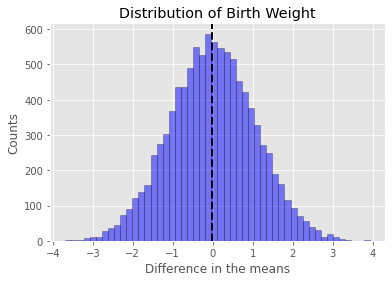

In [12]:
plt.hist(results, color='b', edgecolor='k', alpha=0.5, bins=50)
plt.axvline(np.mean(results), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Difference in the means")
plt.ylabel("Counts")
plt.title("Distribution of Birth Weight")
plt.show()

# Part C: Evaluate P-Value Significance

The p value is 0.0 meaning that the mean difference between birth weights smoking vs nonsmoking is impossible under the null hypothesis. Therefore, we can reject the null hypothesis
<br />
**what needs to change to get nonzero p value?** In the general case, taking more permutations with the permutation test can change the p value. However, in this case, we can see that the test statistic is very high ~8 in comparison to the difference in means from our permutations (highest being around 4). I do not think it is possible to get a nonzero value in this specific scenario without making changes to the Null Hypothesis.

In [13]:
print("The p value is:", p)

The p value is: 0.0


In [14]:
sorted(results, reverse= True)[:5]

[3.925625403755774,
 3.4374484863335653,
 3.3384475730101713,
 3.263343431868293,
 3.2496881334788696]

# Part D: A/B Testing for Age

**Null:** <br/> The distribution of ages of smoking mothers is the same as for non-smoking mothers.
The difference in the sample is due to chance. <br/>
**Alternative:** <br/> The age of smoking mothers is, on average, less than the age of non-smoking
mothers.

Clean data for any unknown values - age = 99 and smoke = 9

In [15]:
data = pd.read_csv("babies.data", delimiter="\s+")
data_age = data[(data.age != 99) & (data.smoke != 9)]

In [16]:
sorted(data_age.age, reverse=True)[:3]

[45, 44, 43]

In [17]:
#len(data_age)

In [18]:
smoking_age = data_age[data_age.smoke == 1]
nonsmoking_age = data_age[data_age.smoke == 0]

In [19]:
age_results, p_age = permutation_test(smoking_age.age, nonsmoking_age.age,10000)

test statistic: 0.8312755131977099


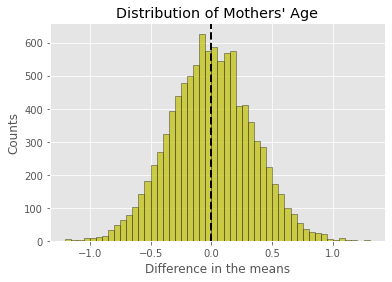

In [20]:
plt.hist(age_results, color='y', edgecolor='k', alpha=0.7, bins=50)
plt.axvline(np.mean(age_results), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Difference in the means")
plt.ylabel("Counts")
plt.title("Distribution of Mothers' Age")
plt.show()

In [21]:
print("The p value is:", p_age)

The p value is: 0.0078


# Part E: A/B Testing for Gestation Periods 

**Null:** <br/> The distribution of gestation periods of smoking mothers is the same as for non-
smoking mothers. The difference in the sample is due to chance. <br/>
**Alternative:** <br/> The gestation periods of smoking mothers is, on average, less than the age of
non-smoking mothers.

Clean data for unknown values

In [22]:
data_gest = data[(data.gestation != 999) & (data.smoke != 9)]

In [23]:
smoking = data_gest[data_gest.smoke == 1]
nonsmoking = data_gest[data_gest.smoke == 0]

In [24]:
gest_results, p_gest = permutation_test(smoking.gestation, nonsmoking.gestation,10000)

test statistic: 2.207736471123212


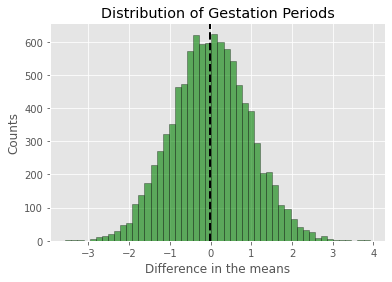

In [25]:
plt.hist(gest_results, color='g', edgecolor='k', alpha=0.6, bins = 50)
plt.axvline(np.mean(gest_results), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Difference in the means")
plt.ylabel("Counts")
plt.title("Distribution of Gestation Periods")
plt.show()

In [26]:
print("The p value is:", p_gest)

The p value is: 0.0107


# Part F: Observations

The a-priori for the probability of making a false discovery (i.e. wrongly rejecting a null hypothesis) is <= 0.05. With our trials, we have the below: <br />
**birth weight:** p = 0.0 <= 0.05 <br />
**mother's age:** p = 0.0078 <= 0.05 <br />
**gestation period:** p = 0.0107 <= 0.05 <br/>

Based on the p values for this specific scenario, we can reject the null hypothesis and conclude that a difference does exist between the gestation periods of the 2 categories. Since the sample size is large, the p value is reasonable and reliable (not making false discoveries). However, if there were many other hypothesis, this dataset might not be large enough to get reliable results.